## ML Part 2-1. Classfication - kNN, GridSearchCV

## 1.kNN (k-Nearest Neighbors)
- 지도 학습
- 주어진 이웃의 개수(k) 만큼 가까운 멤버들과 비교하여 판단하는 방법
  - 개수로 인한 원 안에 새로운 데이터와 가까운 요소의 갯수를 비교
  - 거리 측정 알고리즘 : 유클리드, 맨하튼, Minkowski 거리 등
  - k 값에 따라 소속되는 그룹이 달라질 수 있음
- 데이터의 분포와 상관 없이 사용할 수 있음
- 스케일링이 중요함

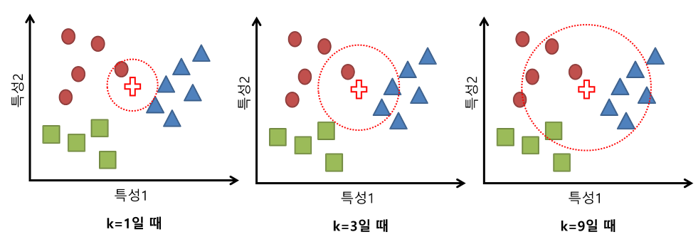

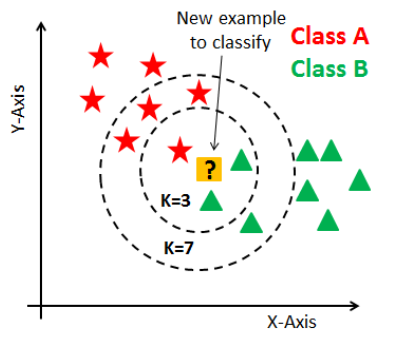

- 출처 : ```https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html```  (다양한 읽을 거리 있음)

### 1-01. Distance Metric - 그림으로 이해
- 'Minkowski' : p=1 이면 'Manhattan' 거리, p=2 면 'Euclidean' 거리
- 암기법 : 1 Man, 2 E

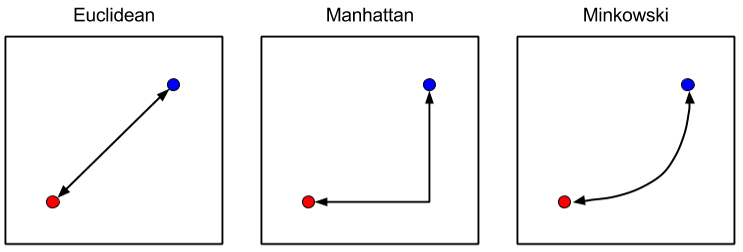
- 출처 : ```https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781785882104/6/ch06lvl1sec40/measuring-distance-or-similarity```

### 1-02. Distance Metric - sklearn API

In [ ]:
from sklearn.neighbors import DistanceMetric

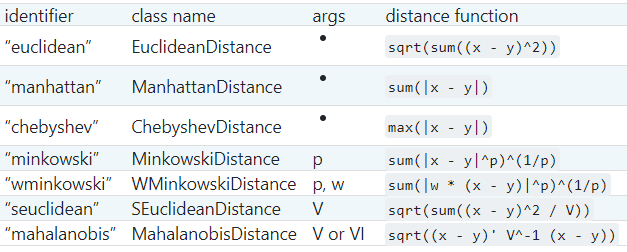

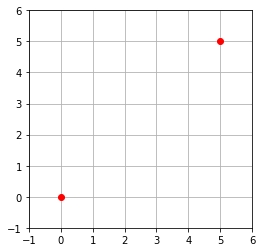

In [ ]:
# 두 개의 점[(0,0), (5,5)]을 준비하고, 그래프를 그려 확인한다 

import matplotlib.pyplot as plt
import numpy as np
x = np.array([[0,0],
              [5,5]])

plt.figure(figsize=(4,4))
plt.xlim(-1, 6)
plt.ylim(-1, 6)     
plt.plot(x[:,0], x[:,1], 'ro')
plt.grid(True)

In [ ]:
# euclidean 거리를 구해 출력
dist = DistanceMetric.get_metric('euclidean')
dist.pairwise(x)

array([[0.        , 7.07106781],
       [7.07106781, 0.        ]])

In [ ]:
# minkowski, p=2 를 사용하여 거리를 구해 출력  = euclidean (L2 norm - 선형회귀에서 다룸)
dist = DistanceMetric.get_metric('minkowski', p=2)
dist.pairwise(x)

array([[0.        , 7.07106781],
       [7.07106781, 0.        ]])

In [ ]:
# manhattan 거리를 구해 출력
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise(x)

array([[ 0., 10.],
       [10.,  0.]])

In [ ]:
# minkowski, p=1 을 사용하여 거리를 구해 출력  = manhattan (L1 norm - 선형회귀에서 다룸)
dist = DistanceMetric.get_metric('minkowski', p=1)
dist.pairwise(x)

array([[ 0., 10.],
       [10.,  0.]])

In [ ]:
import pandas as pd
# manhattan
# 5 차원, 3개의 data
x = [[0,1,2,3,4],
     [3,4,5,6,7],
     [4,5,6,7,8]]
df = pd.DataFrame(x)
display(df)
d01 = [ abs(a-b) for a, b in zip(df.loc[0,:], df.loc[1,:]) ]
d02 = [ abs(a-b) for a, b in zip(df.loc[0,:], df.loc[2,:]) ]
sum(d01), sum(d02)   

,0,1,2,3,4
0,0,1,2,3,4
1,3,4,5,6,7
2,4,5,6,7,8


(15, 20)

In [ ]:
dist.pairwise(x)

array([[ 0., 30., 40.],
       [30.,  0., 10.],
       [40., 10.,  0.]])

In [ ]:
dist

## 2.가상 데이터 만들어 kNN 수행

### 2-01. 가상 dataset 만들기
- sklearn.datasets
- 가상 데이터 만들기 : make_XXX()
   - 필요에 따라 랜덤한 숫자로 원하는 분포의 가상 데이터 생성
   - make_moons() : 태극 문양 분포의 데이터 생성
   - make_blobs() : 군집을 위한 데이터 무작위 생성
   - make_classification() : 분류를 위한 데이터 생성


- sklearn.datasets.make_classification()
   - n_samples=100 : 표본 데이터의 수
   - n_features=20 : 독립 변수의 수(전체 Feature의 수)
   - n_informative=2 : 독립변수 중 종속변수와 상관 관계가 있는 성분의 수
   - n_redundent=2 : 독립변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
   - n_repeated=0 : 독립변수 중 단순 중복된 성분의 수
   - n_classes=2 : 종속 변수의 클래스 수
   - n_clusters_per_class=2 : 클래스 당 클러스터의 수
   - random_state: random의 seed 
   - weights=None : 각 클래스에 할당된 표본 수
   - flip_y=0.01 : 클래스가 임의로 교환되는 샘플의 일부, 라벨에 노이즈를 생성하여 분류를 어렵게 만듦 
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html


- sklearn.datasets.make_blobs()
   - 분류용 가상 데이터 생성, 등방성(모든 방향으로 동일한) 가우시안 정규분포를 이용
   - n_samples=100 : 표본 데이터의 수
   - n_features=2 : 독립 변수의 수(전체 Feature의 수)
   - centers=3: 생성할 클러스터의 수 혹은 센터 -> [cent, n_feature]크기 배열
   - cluster_std=1.0 : 군집의 표준편차
   - random_state: random의 seed
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


In [71]:
from sklearn.datasets import make_blobs

# X: 독립변수 shape :(n_samples, n_features)
# y: 종속변수: shape :(n_samples,) =>  값의 종류 : centers
X, y = make_blobs(n_samples=30, centers=2, cluster_std=1,random_state=4)
list(zip(X, y))[:5]

[(array([9.76566918, 1.27689813]), 0),
 (array([8.35760513, 0.99907772]), 0),
 (array([9.96346605, 4.59676542]), 1),
 (array([11.0329545 , -0.16816717]), 0),
 (array([11.54155807,  5.21116083]), 1)]

In [ ]:
import pandas as pd
x1 = pd.DataFrame(X[y==0])
display(x1.mean(), x1.median(), x1.std())
print()
x2 = pd.DataFrame(X[y==1])
display(x2.mean(), x2.median(), x2.std())
# 평균과 중앙값이 비슷할 때 대표값으로의 의미가 있음

In [25]:
display(X[y == 0][:3],X[y == 1][:3])

array([[ 9.76566918,  1.27689813],
       [ 8.35760513,  0.99907772],
       [11.0329545 , -0.16816717]])

array([[ 9.96346605,  4.59676542],
       [11.54155807,  5.21116083],
       [ 8.1062269 ,  4.28695977]])

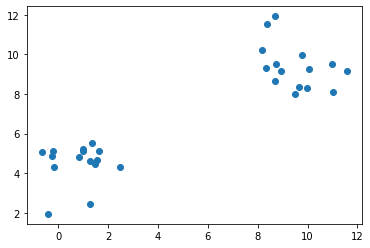

In [73]:
import matplotlib.pyplot as plt
plt.scatter(X[y == 0],X[y == 1]) # 그래프에서 y==0을 x, y==1을 y축으로 표시
plt.show()

In [115]:
from sklearn.datasets import make_classification

# 50개 샘플, 2개의 독립변수, 2개의 클래스, seed(0), 다른 독립변수의 선형 조합으로 나타나는 성분 없음
# X: 독립변수 shape :(n_samples, n_features)  
# y: 종속변수: shape :(n_samples,)  =>  값의 종류 : n_classes
X, y = make_classification(n_samples=50, n_features=2, 
                           n_informative = 2, n_redundant=0, n_repeated=0,
                           n_classes=2,  random_state=0)

list(zip(X, y))[:3]

[(array([1.12049186, 1.38585905]), 1),
 (array([-3.3039253 , -1.68103713]), 0),
 (array([1.1616032 , 0.52728774]), 1)]

In [125]:
# y에서 값이 0인 것을 red, 1인 것을 blue로 나눔
blue = X[y==0]
red  = X[y==1]
display(red[:3], blue[:3])

array([[1.12049186, 1.38585905],
       [1.1616032 , 0.52728774],
       [1.14115334, 0.98374795]])

array([[-3.3039253 , -1.68103713],
       [ 1.66873628, -0.62452293],
       [ 2.25325619, -0.25821176]])

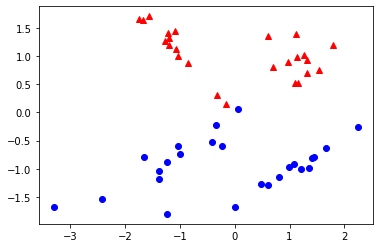

In [127]:
import matplotlib.pyplot as plt

# y=0, 1에 대해 각각 feature[0]을 x, feature[1]을 y축으로 표시
plt.plot(blue[:,0], blue[:,1], 'bo')
plt.plot(red[:,0], red[:,1], 'r^')
plt.show()

### 2-02. kNN 수행하기
- sklearn.neighbors.KNeighborsClassifier
   - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
   - 거리를 구하는 방법을 선택할 수 있음, 기본은 'minkowski', p=2 로 'euclidean' 거리, p=1 이면 'Manhattan' 거리
   - 짧은 거리의 노드를 찾는 알고리즘 선택 가능 : algorithm='kd_tree', 'ball_tree', 'brute', 'auto' (default)
   - knn = KNeighborsClassifier(K)
   - knn.fit() : Fit the model using X as training data and y as target values
   - knn.predict() : Predict the class labels for the provided data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# algorithm='auto'  // KD tree, Ball tree, leaf_size=30,
# metric = 'minkowski', p=2 => euclidean
# metric_params=None, n_jobs=None, n_neighbors=5, 
# weights='uniform'
knn = KNeighborsClassifier()
# knn의 get_params 메서드에 대한 docstring 확인
#print(knn.get_params.__doc__)    
print(knn.get_params())
if 0:
    print(knn.set_params.__doc__)
    print(knn.set_params(p=1, n_neighbors=3))
    print(knn.get_params())

In [ ]:
# knn의 fit 메서드에 대한 docstring을 확인하여 보자
print()

new data : [[-0.2  0. ]]
predicted : [1]


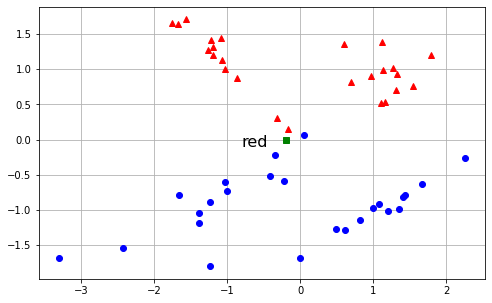

In [140]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

# 새로운 점 표시
#np.random.seed(1)
#new = np.random.randn(1, 2)
new = np.array([[-0.2, 0]])
print(f'new data : {new}')
#  그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(red[:,0],  red[:,1], 'r^')
plt.plot(blue[:,0], blue[:,1], 'bo')
plt.plot(new[:,0],  new[:,1], 'gs')

# n을 1, 3으로 수정하여 결과를 확인해 본다
knn = KNeighborsClassifier(1, p = 2) 
knn.fit(X, y)
pred = knn.predict(new)
print('predicted :',pred)
plt.annotate('red' if pred==1 else 'blue', xy=new[0], xytext=[-0.8,-0.1], fontsize=16, color='black')
plt.grid()
plt.show()

## 3.kNN 손글씨 숫자 분류

### 3-01. 데이터 세트 가져오기

In [142]:
from sklearn.datasets import load_digits

# 손글씨 데이터세트 가져오기
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [145]:
# digits.images shape 확인
display(digits.images.shape, digits.images[0].shape, digits.images[0])

(1797, 8, 8)

(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [185]:
# 출력 데이터의 종류와 비율을 확인한다
np.unique(digits.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

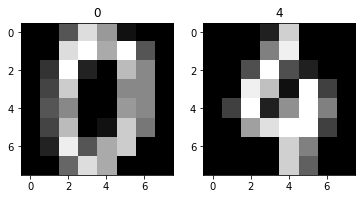

In [144]:
import matplotlib.pyplot as plt
# plt.imshow를 사용하여 그림 확인하기
plt.subplot(1, 2, 1)
plt.imshow(digits.images[0], cmap='gray')
plt.title(digits.target[0])
plt.subplot(1, 2, 2)
plt.imshow(digits.images[100], cmap='gray')
plt.title(digits.target[100])
plt.show()

In [ ]:
# digits.data, digits.images 두 가지는 shape만 다를뿐 같은 데이터!
np.all(digits.data[0] == digits.images[0].reshape(-1))

True

### 3-02. 데이터 세트 분할 및 모델 적용

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Train, Test 셋 분리, 0.75 : 0.25 분리 사용 (default)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# k가 3인 knn 분류기 생성
knn = KNeighborsClassifier(3)

# knn 에 Train set 전달하여 모델 생성
knn.fit(X_train, y_train)

# knn 모델에 Test set 적용하여 예측치 얻기
pred = knn.predict(X_test)

### 3-03. 모델 평가
- 분류 모델에 대한 평가 방법은 Logistic Regression에서 학습
- accuracy(정확도)는 전체에서 올바르게 예측한 비율을 의미함

In [148]:
import numpy as np
dataCnt = y_test.shape[0]
successCnt = np.sum(y_test == pred)
successPercent = np.mean(y_test == pred) 
print(f'총 {dataCnt}개 중 {successCnt}개 분류 성공! {successPercent*100:.2f}%') 

총 450개 중 445개 분류 성공! 98.89%


In [149]:
# knn의 score 사용 - test set을 사용함
knn.score(X_test, y_test)

0.9888888888888889

In [150]:
# sklearn에서 제공하는 metrics 사용 - test결과와, 모델에서 예측한 결과를 사용함
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9888888888888889

In [151]:
# k를 1 ~ 9 로 변경하면서 정확도(Accuracy)를 알아봄
for k in range(1, 10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    acc= knn.score(X_test, y_test)
    print(f'k: {k}, acc:{acc:.3f}')

k: 1, acc:0.987
k: 2, acc:0.984
k: 3, acc:0.989
k: 4, acc:0.989
k: 5, acc:0.984
k: 6, acc:0.989
k: 7, acc:0.984
k: 8, acc:0.984
k: 9, acc:0.984


### 3-04. GridSearchCV로 파라미터 튜닝
- 최적의 파라미터 튜닝
- sklearn.model_selection.GridSearchCV(estimator, param_grid)
  - estimator : estimator object
  - param_grid : dict, estimetor 튜닝을 위해 시도할 파라미터 이름과 값
  - cv : cross validation, the default 5-fold cross validation

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [156]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

cv = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(1, 10)}, cv=2)
cv.fit(X_train, y_train)
print('best param:', cv.best_params_)

estimator = cv.best_estimator_
print(estimator.score(X_test, y_test))
display(pd.DataFrame(cv.cv_results_).iloc[:, [4, 6, 7, 8, 9, 10]])


best param: {'n_neighbors': 1}
0.9866666666666667


,param_n_neighbors,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1,0.976261,0.983655,0.979958,0.003697,1
1,2,0.967359,0.965825,0.966592,0.000767,5
2,3,0.979228,0.973254,0.976241,0.002987,2
3,4,0.973294,0.959881,0.966587,0.006706,6
4,5,0.977745,0.967311,0.972528,0.005217,3
5,6,0.970326,0.958395,0.964361,0.005966,9
6,7,0.977745,0.962853,0.970299,0.007446,4
7,8,0.968843,0.961367,0.965105,0.003738,8
8,9,0.967359,0.962853,0.965106,0.002253,7


### 3-05. 직접 쓴 숫자로 Test


In [157]:
!wget -O img2data.py http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fimg2data.py

--2020-12-16 21:34:50--  http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fimg2data.py
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2216 (2.2K) [text/x-python]
Saving to: ‘img2data.py’

img2data.py         100%[===================>]   2.16K  --.-KB/s    in 0s      

2020-12-16 21:34:51 (445 MB/s) - ‘img2data.py’ saved [2216/2216]



In [ ]:
# 온라인 그림판 - 직접 숫자 쓰고 싶다면!!  
https://sketch.io/sketchpad/

In [ ]:
# 준비된 손글씨 이미지 다운로드 

In [175]:
!wget -N --http-user=mysuni --http-passwd=mysuni1!  http://sk.jaen.kr:8080/0458.png

--2020-12-16 21:44:02--  http://sk.jaen.kr:8080/0458.png
Resolving sk.jaen.kr (sk.jaen.kr)... 49.247.134.238
Connecting to sk.jaen.kr (sk.jaen.kr)|49.247.134.238|:8080... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Authentication required."
Reusing existing connection to sk.jaen.kr:8080.
HTTP request sent, awaiting response... 200 OK
Length: 7815 (7.6K) [image/png]
Saving to: ‘0458.png’

0458.png            100%[===================>]   7.63K  --.-KB/s    in 0s      

2020-12-16 21:44:03 (892 MB/s) - ‘0458.png’ saved [7815/7815]



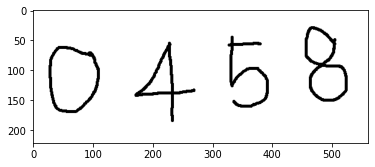

In [176]:
# 다운로드 받은 손글씨 이미지(0458.png) 확인
import cv2
import matplotlib.pyplot as plt
filename = '0458.png'
image = cv2.imread(filename)
plt.imshow(image)

In [159]:
# 위의 GridSearchCV 의 결과로 찾은 best params k=1 값을 사용하여 knn 모델 생성
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(digits.data, digits.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# img2data.py 다운로드

In [160]:
# knn 모델에서 사용한 데이터 특성 조사
X_train.max(), X_train.min()

(16.0, 0.0)

In [177]:
# 손글씨 이미지를 knn 모델에서 사용할 수 있는 형태로 만들어서 사용
import img2data
import cv2
filename = '0458.png'
image = cv2.imread(filename)
# 손글씨 이미지에서 숫자를 찾아 8*8 이미지로 저장 
numbers = img2data.img2digits(image, (8,8), reshape=True)
print(f'total {len(numbers)} images\n')
for num in numbers[:2]:
    print(num[:20])
    print(f'max={num.max()}, min={num.min()}')
    print('-'*75)

total 4 images

[[  0  77  98  98 101  74  20   0   0 100   0   0   3  42 105   0  13  81
    0   0   0   0 100   7  16  78   0   0   0   0  75  18   0  91   0   0
    0   0  98   0   0  96   0   0   0   1 109   0   0  98   0   0   0 109
   21   0   0  57  98  94 112  26   0   0]]
max=112, min=0
---------------------------------------------------------------------------
[[  0   0   0   3 114   0   0   0   0   0   0  78  92   0   0   0   0   0
    1  87  77   0   0   0   0   0  71  21  78   0   0   0   0  52  66   9
   85  24  64   3   3 102  78  69 122  55  18   0   0   0   0   0  77   0
    0   0   0   0   0   0  76   0   0   0]]
max=122, min=0
---------------------------------------------------------------------------


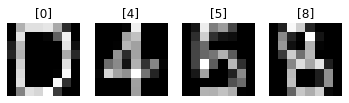

In [178]:
import numpy as np
import img2data
import cv2
filename = '0458.png'
image = cv2.imread(filename)
# 손글씨 이미지에서 숫자를 찾아 8*8 이미지로 저장 
numbers = img2data.img2digits(image, (8,8), reshape=True)

for i, n in enumerate(numbers, start=1):
  n = n/n.max() * 16     # 0~255 구간을 0~16 구간으로 변경
  pred = knn.predict(n)
  plt.subplot(1, len(numbers), i)
  plt.title(str(pred))
  plt.imshow(n.reshape(8, 8), cmap='gray')
  plt.axis('off')

## 4.유방암 예제

### 4-01. 데이터 세트 가져오기
- 유방암 데이터 세트에 대해 가져와 살펴본다

In [180]:
# 유방암 데이터 세트를 가져온다
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() 

In [181]:
# 유방암 데이터 세트의 key 목록을 확인한다
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [182]:
# cancer의 입력과 출력으로 사용할 데이터 (X, y)의 shape을 확인한다
# X : data,  y : target
display(cancer.data.shape, cancer.target.shape)

(569, 30)

(569,)

In [ ]:
# cancer의 입력 데이터 2개의 값을 확인한다
cancer.data[:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [ ]:
# cancer의 feature_names 확인
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [195]:
# cancer의 feature_names의 shape 확인
cancer.feature_names.shape

(30,)

In [187]:
# cancer의 target_names 확인
cancer.target_names  # 악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# cancer의 target 종류별 개수 확인
np.bincount(cancer.target)

array([212, 357])

In [196]:
# cancer의 target_names와 개수 매칭
list(zip(cancer.target_names, np.bincount(cancer.target)))

[('malignant', 212), ('benign', 357)]

In [198]:
# cancer의 target_names와 개수 매칭으로 dict 객체 만들기
dict(zip(cancer.target_names, np.bincount(cancer.target)))

{'benign': 357, 'malignant': 212}

### 4-02. 데이터 세트 분할, 모델적용, 평가
- train과 test의 y값 분포 차이가 작은 것이 좋음

In [199]:
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt 

In [211]:
# stratify=cancer.target를 사용하여 train, test에 포함되는 y값의 분포를 비슷하게 조정함
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, 
                                                   random_state=66)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9230769230769231

### 4-03. 그래프로 'best n 값' 찾기
- y가 불균형 할 경우

In [204]:
n = range(1, 11)
training_accuracy = []
test_accuracy = []
for nn in n: 
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

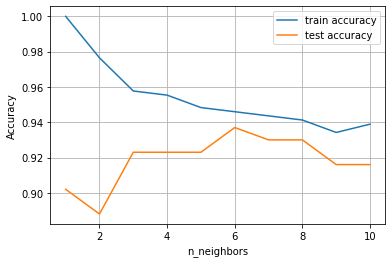

In [207]:
plt.plot(n, training_accuracy, label='train accuracy')
plt.plot(n, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.grid()
plt.show()

In [219]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
# score를 비교하면 3일때보다 6일 때 더 높은 정확도를 갖는 것을 알 수 있다

0.9370629370629371

## 5.종류 구분 예제

### 5-01. 단맛, 아삭함으로 종류 구분

In [220]:
import pandas as pd
import numpy as np

In [225]:
data = {
    '재료': ['Apple', 'Bacon', 'Banana', 'Carrot', 'Grape', 'Green bean', 'Nuts', 'Orange', 'lettuce'],
    '단맛': [10, 1, 10, 7, 8, 3, 3, 7, 3],
    '아삭': [9, 4, 1, 10, 5, 7, 6 ,3, 8],
    '종류': ['Fruites', 'Proteins', 'Fruites', 'vegetables', 'Fruites', 'vegetables', 'Proteins', 'Fruites', 'vegetables']
}

df = pd.DataFrame(data)
df

,재료,단맛,아삭,종류
0,Apple,10,9,Fruites
1,Bacon,1,4,Proteins
2,Banana,10,1,Fruites
3,Carrot,7,10,vegetables
4,Grape,8,5,Fruites
5,Green bean,3,7,vegetables
6,Nuts,3,6,Proteins
7,Orange,7,3,Fruites
8,lettuce,3,8,vegetables


In [226]:
kind = df['종류'].unique()
kind

array(['Fruites', 'Proteins', 'vegetables'], dtype=object)

In [227]:
# 숫자형으로 변경
mydict = { k:v for v, k in enumerate(kind)}
df['target'] = df['종류'].replace(mydict)
df

,재료,단맛,아삭,종류,target
0,Apple,10,9,Fruites,0
1,Bacon,1,4,Proteins,1
2,Banana,10,1,Fruites,0
3,Carrot,7,10,vegetables,2
4,Grape,8,5,Fruites,0
5,Green bean,3,7,vegetables,2
6,Nuts,3,6,Proteins,1
7,Orange,7,3,Fruites,0
8,lettuce,3,8,vegetables,2


In [228]:
X_train = df[['단맛', '아삭']]
y_train = df['target']

In [229]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [230]:
clf.score(X_train, y_train)

0.8888888888888888

### 5-02. 동작확인

In [231]:
pred = clf.predict([[4, 2]])
print(pred, kind[pred[0]])

[1] Proteins


### 5-03. 단위가 다른경우는?

In [232]:
df['단맛2'] = df['단맛']*10
df

,재료,단맛,아삭,종류,target,단맛2
0,Apple,10,9,Fruites,0,100
1,Bacon,1,4,Proteins,1,10
2,Banana,10,1,Fruites,0,100
3,Carrot,7,10,vegetables,2,70
4,Grape,8,5,Fruites,0,80
5,Green bean,3,7,vegetables,2,30
6,Nuts,3,6,Proteins,1,30
7,Orange,7,3,Fruites,0,70
8,lettuce,3,8,vegetables,2,30


In [233]:
X_train = df[['단맛2', '아삭']]
y_train = df['target']

In [234]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [235]:
clf.score(X_train, y_train)  # 성능이 저하된 것을 볼 수 있음

0.7777777777777778

### 5-04. 스케일러 사용

In [236]:
# StancardScaler 사용하여 정규 분포 만들기
from sklearn.preprocessing import StandardScaler
scaledX = StandardScaler().fit_transform(X_train)  

In [237]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(scaledX, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [238]:
clf.score(scaledX, y_train) # 성능이 향상된 것을 볼 수 있음

0.8888888888888888